In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ruptures as rpt

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import ruptures as rpt

# np.random.seed(125)

# x = np.concatenate([
#     np.random.normal(7, 0.05, 50),
#     np.random.normal(7.4, 0.05, 25),
#     np.random.normal(7.6, 0.05, 20),
#     np.random.normal(7.8, 0.05, 30),
#     np.random.normal(8.2, 0.05, 25),
#     np.random.normal(7.9, 0.05, 25),
#     np.random.normal(7.7, 0.05, 25),
#     np.random.normal(7.3, 0.05, 20)
# ])

# y = np.arange(len(x))

# data = np.column_stack((x, y))
# model = "l1" 
# algo = rpt.Pelt(model=model).fit(x)
# change_points = algo.predict(pen=1)

# # geriausiai veikiantys parametrai:
# # data = np.column_stack((x, y))
# # model = "l2" 
# # algo = rpt.Pelt(model=model).fit(x)
# # change_points = algo.predict(pen=0.1)

# # model = "linear" 
# # algo = rpt.Pelt(model=model).fit(data)
# # change_points = algo.predict(pen=100)

# print("Change points:", change_points)

# plt.plot(x)
# for point in change_points:
#     plt.axvline(point,color='r')

In [3]:
def transform_value(j, change_points, values):
    for i in range(len(change_points) - 1):
        if change_points[i] <= j < change_points[i + 1]:
            return values[i]
    return values[-1] 

In [4]:
def get_change_points(data):

    model = "l1" 
    algo = rpt.Pelt(model=model).fit(data)
    change_points = algo.predict(pen=1)
    change_points.insert(0,0)
    print("Change points:", change_points)

    return change_points

In [5]:
def transform_data(data):
    change_points=get_change_points(data)

    stepped_data=[]
    for i in range(len(change_points)-1):
        stepped_data.append(data[change_points[i]:change_points[i+1]].mean())

    transformed_data=[]
    for i in range(len(data)):
        transformed_data.append(transform_value(i,change_points,stepped_data))
        # print(transform_value(i,change_points,stepped_data))

    # transformed_info=pd.DataFrame({'change_points':change_points,'stepped_data':stepped_data,'values':transformed_data})
    transformed_info=[]
    transformed_info.append(change_points)
    transformed_info.append(stepped_data)
    transformed_info.append(transformed_data)

    # print(change_points)
    # print(stepped_data)
    # print(transformed_info)

    return transformed_info

In [14]:
tests=['005','009','035']

Change points: [0, 40, 45, 50, 165, 170, 215, 225, 250, 255, 335, 360, 494]
Change points: [0, 40, 50, 110, 115, 125, 130, 155, 165, 170, 195, 200, 215, 225, 250, 255, 335, 345, 350, 360, 390, 395, 430, 435, 465, 470, 494]


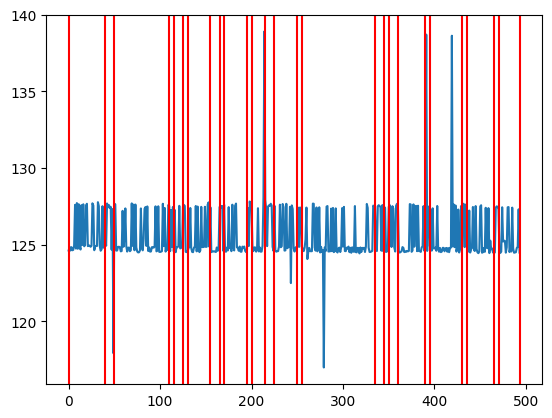

Change points: [0, 305, 494]
Change points: [0, 60, 425, 494]


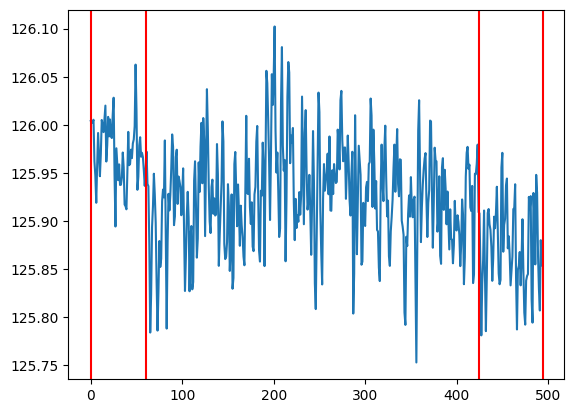

Change points: [0, 445, 494]
Change points: [0, 65, 405, 494]


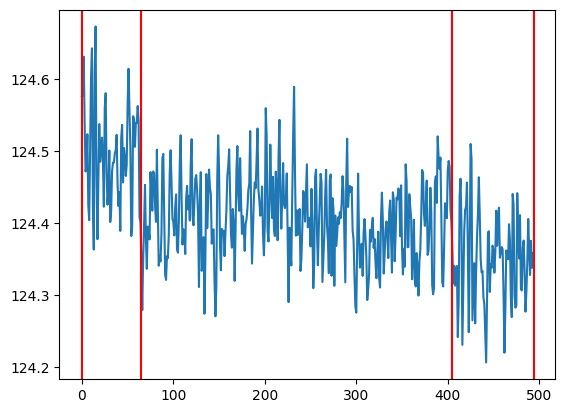

Change points: [0, 15, 20, 30, 64]
Change points: [0, 15, 20, 30, 55, 64]


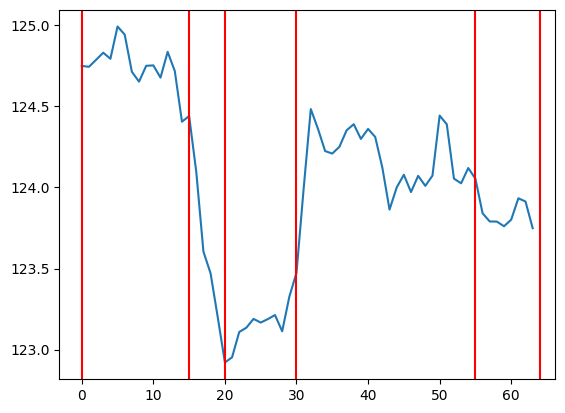

Change points: [0, 10, 20, 30, 64]
Change points: [0, 10, 15, 50, 64]


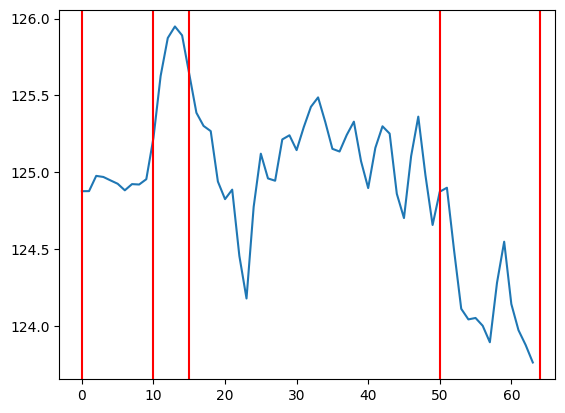

[Errno 2] No such file or directory: '../ExcelsTesting/Video009_object3_hough_post_processed_mean.xlsx'
Change points: [0, 95, 575, 1290, 1468]
Change points: [0, 275, 520, 730, 1090, 1468]


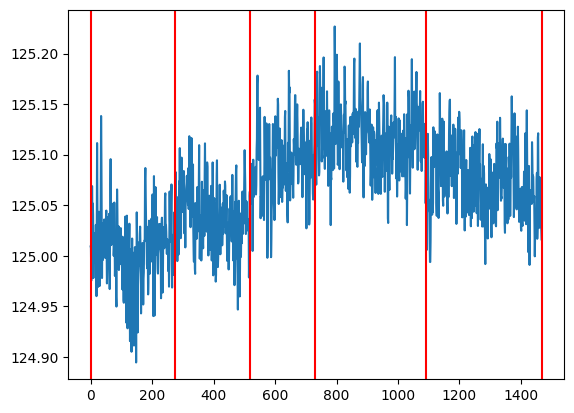

Change points: [0, 95, 405, 585, 1468]
Change points: [0, 260, 530, 1095, 1468]


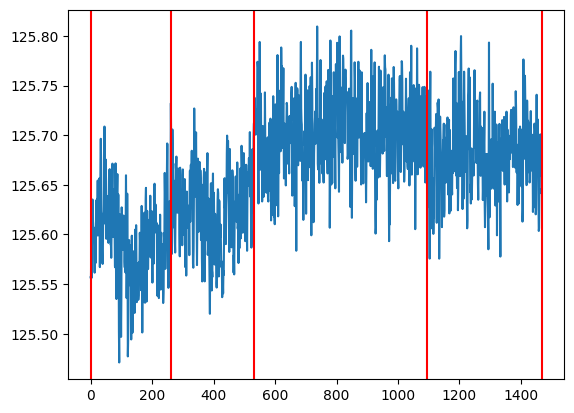

[Errno 2] No such file or directory: '../ExcelsTesting/Video035_object3_hough_post_processed_mean.xlsx'


: 

In [ ]:
for test in tests:
    for object in range(1,4):
        try:
            data = pd.read_excel(f'../ExcelsTesting/Video{test}_object{object}_hough_post_processed_mean.xlsx')
            x=data['center_x(crow)'].values
            y=data['center_y(ccol)'].values

            # geriausiai veikiantys parametrai:
            # data = np.column_stack((x, y))
            # model = "l2" 
            # algo = rpt.Pelt(model=model).fit(x)
            # change_points = algo.predict(pen=0.1)

            transformed_x=transform_data(x)
            transformed_y=transform_data(y)

            plt.plot(y)
            for point in transformed_y[0]:
                plt.axvline(point,color='r')
            plt.show()



            df=pd.DataFrame({'center_x':transformed_x[2],'center_y':transformed_y[2],'radius':data['circle_radius'].values})
            df.to_excel(f'../ExcelsTesting/Video{test}_object{object}_hough_changepoints.xlsx')
        except Exception as e:
            print(e)
            continue

In [8]:
# df.to_excel('transformed.xlsx')

ValueError: Input could not be cast to an at-least-1D NumPy array

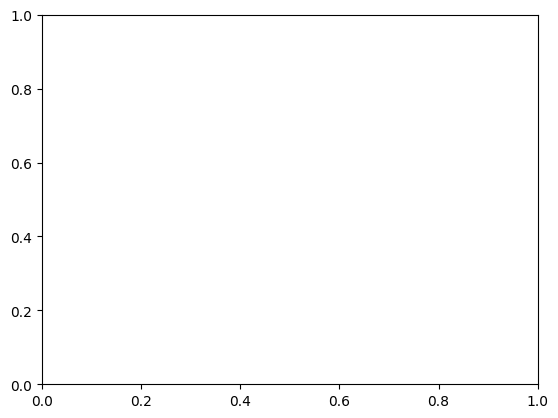

In [9]:
plt.plot(transformed_x)
# for point in change_points:
#     plt.axvline(point,color='r')